In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Risk Analytics.csv')
df.head(10)

,Loan ID,Payment,Loan Type,Gender,Have a car?,Have a house,Number of Children,Total Income,Amount of Credit,Suite Type,Income Type,Education Type,Family Status,Have a phone?,Have a mail?,Profession,Number of family members,Organization
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,1,0,Laborers,1.0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,Family,State servant,Higher education,Married,1,0,Core staff,2.0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,1,0,Laborers,1.0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,1,0,Laborers,2.0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,1,0,Core staff,1.0,Religion
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,"Spouse, partner",State servant,Secondary / secondary special,Married,1,0,Laborers,2.0,Other
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,Unaccompanied,Commercial associate,Higher education,Married,1,0,Accountants,3.0,Business Entity Type 3
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,Unaccompanied,State servant,Higher education,Married,1,0,Managers,2.0,Other
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,Children,Pensioner,Secondary / secondary special,Married,0,0,NaN,2.0,XNA
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,1,0,Laborers,1.0,Electricity


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Loan ID                   307511 non-null  int64  
 1   Payment                   307511 non-null  int64  
 2   Loan Type                 307511 non-null  object 
 3   Gender                    307511 non-null  object 
 4   Have a car?               307511 non-null  object 
 5   Have a house              307511 non-null  object 
 6   Number of Children        307511 non-null  int64  
 7   Total Income              307511 non-null  float64
 8   Amount of Credit          307511 non-null  float64
 9   Suite Type                306219 non-null  object 
 10  Income Type               307511 non-null  object 
 11  Education Type            307511 non-null  object 
 12  Family Status             307511 non-null  object 
 13  Have a phone?             307511 non-null  i

In [4]:
df['Profession'].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Loan ID                   307511 non-null  int64  
 1   Payment                   307511 non-null  int64  
 2   Loan Type                 307511 non-null  object 
 3   Gender                    307511 non-null  object 
 4   Have a car?               307511 non-null  object 
 5   Have a house              307511 non-null  object 
 6   Number of Children        307511 non-null  int64  
 7   Total Income              307511 non-null  float64
 8   Amount of Credit          307511 non-null  float64
 9   Suite Type                306219 non-null  object 
 10  Income Type               307511 non-null  object 
 11  Education Type            307511 non-null  object 
 12  Family Status             307511 non-null  object 
 13  Have a phone?             307511 non-null  i

In [6]:
df.corr()

,Loan ID,Payment,Number of Children,Total Income,Amount of Credit,Have a phone?,Have a mail?,Number of family members
Loan ID,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.001337,0.000281,-0.002895
Payment,-0.002108,1.000000,0.019187,-0.003982,-0.030369,0.045982,-0.001758,0.009308
Number of Children,-0.001129,0.019187,1.000000,0.012882,0.002145,0.240714,0.022619,0.879161
Total Income,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.063994,0.038378,0.016342
Amount of Credit,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.065519,0.016632,0.063160
Have a phone?,-0.001337,0.045982,0.240714,0.063994,0.065519,1.000000,0.062542,0.233950
Have a mail?,0.000281,-0.001758,0.022619,0.038378,0.016632,0.062542,1.000000,0.018081
Number of family members,-0.002895,0.009308,0.879161,0.016342,0.063160,0.233950,0.018081,1.000000


In [7]:
df.describe()

,Loan ID,Payment,Number of Children,Total Income,Amount of Credit,Have a phone?,Have a mail?,Number of family members
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,307511.000000,307509.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,0.819889,0.056720,2.152665
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,0.384280,0.231307,0.910682
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,0.000000,0.000000,1.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,1.000000,0.000000,2.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,1.000000,0.000000,2.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,1.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,1.000000,1.000000,20.000000


C:\Users\Huseyn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Number of family members'>

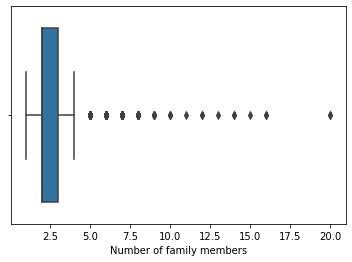

In [8]:
sns.boxplot(df['Number of family members'])

In [9]:
Q1 = df['Number of family members'].quantile(0.25)
Q3 = df['Number of family members'].quantile(0.75)
IQR = Q3 - Q1
print(Q1,Q3,IQR)

2.0 3.0 1.0


In [10]:
df = df[(df['Number of family members'] > (Q1 - 1.5 * IQR)) & (df['Number of family members'] < (Q3 + 1.5 * IQR) )]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303502 entries, 0 to 307510
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Loan ID                   303502 non-null  int64  
 1   Payment                   303502 non-null  int64  
 2   Loan Type                 303502 non-null  object 
 3   Gender                    303502 non-null  object 
 4   Have a car?               303502 non-null  object 
 5   Have a house              303502 non-null  object 
 6   Number of Children        303502 non-null  int64  
 7   Total Income              303502 non-null  float64
 8   Amount of Credit          303502 non-null  float64
 9   Suite Type                302232 non-null  object 
 10  Income Type               303502 non-null  object 
 11  Education Type            303502 non-null  object 
 12  Family Status             303502 non-null  object 
 13  Have a phone?             303502 non-null  i

C:\Users\Huseyn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Number of family members'>

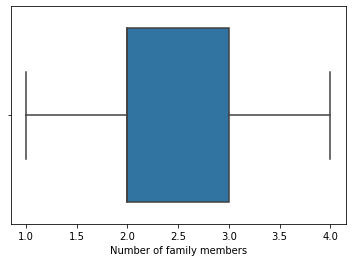

In [12]:
sns.boxplot(df['Number of family members'])

C:\Users\Huseyn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Number of Children'>

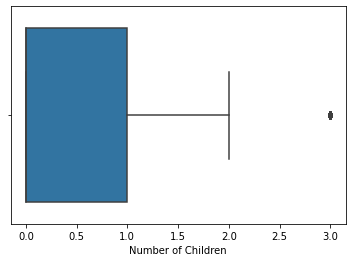

In [13]:
sns.boxplot(df['Number of Children'])

In [14]:
Q1 = df['Number of Children'].quantile(0.25)
Q3 = df['Number of Children'].quantile(0.75)
IQR = Q3 - Q1
print(Q1,Q3,IQR)

0.0 1.0 1.0


In [15]:
df = df[(df['Number of Children'] > (Q1 - 1.5 * IQR)) & (df['Number of Children'] < (Q3 + 1.5 * IQR) )]

C:\Users\Huseyn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Number of Children'>

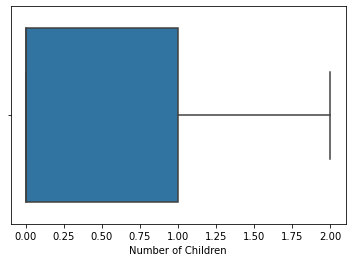

In [16]:
sns.boxplot(df['Number of Children'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303237 entries, 0 to 307510
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Loan ID                   303237 non-null  int64  
 1   Payment                   303237 non-null  int64  
 2   Loan Type                 303237 non-null  object 
 3   Gender                    303237 non-null  object 
 4   Have a car?               303237 non-null  object 
 5   Have a house              303237 non-null  object 
 6   Number of Children        303237 non-null  int64  
 7   Total Income              303237 non-null  float64
 8   Amount of Credit          303237 non-null  float64
 9   Suite Type                301969 non-null  object 
 10  Income Type               303237 non-null  object 
 11  Education Type            303237 non-null  object 
 12  Family Status             303237 non-null  object 
 13  Have a phone?             303237 non-null  i

C:\Users\Huseyn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Amount of Credit'>

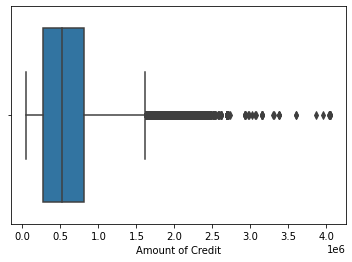

In [18]:
sns.boxplot(df['Amount of Credit'])

In [19]:
Q1 = df['Amount of Credit'].quantile(0.25)
Q3 = df['Amount of Credit'].quantile(0.75)
IQR = Q3 - Q1
print(Q1,Q3,IQR)

270000.0 808650.0 538650.0


In [20]:
df = df[(df['Amount of Credit'] > (Q1 - 1.5 * IQR)) & (df['Amount of Credit'] < (Q3 + 1.5 * IQR) )]

C:\Users\Huseyn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Amount of Credit'>

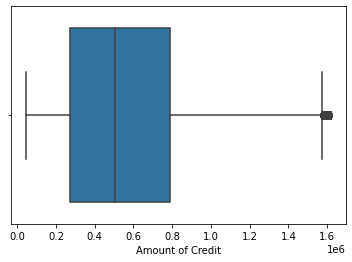

In [21]:
sns.boxplot(df['Amount of Credit'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296765 entries, 0 to 307510
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Loan ID                   296765 non-null  int64  
 1   Payment                   296765 non-null  int64  
 2   Loan Type                 296765 non-null  object 
 3   Gender                    296765 non-null  object 
 4   Have a car?               296765 non-null  object 
 5   Have a house              296765 non-null  object 
 6   Number of Children        296765 non-null  int64  
 7   Total Income              296765 non-null  float64
 8   Amount of Credit          296765 non-null  float64
 9   Suite Type                295570 non-null  object 
 10  Income Type               296765 non-null  object 
 11  Education Type            296765 non-null  object 
 12  Family Status             296765 non-null  object 
 13  Have a phone?             296765 non-null  i

C:\Users\Huseyn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total Income'>

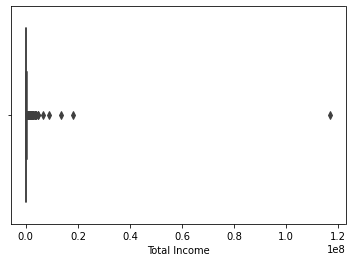

In [23]:
sns.boxplot(df['Total Income'])

In [24]:
Q1 = df['Total Income'].quantile(0.25)
Q3 = df['Total Income'].quantile(0.75)
IQR = Q3 - Q1
print(Q1,Q3,IQR)

112500.0 202500.0 90000.0


In [25]:
df = df[(df['Total Income'] > (Q1 - 1.5 * IQR)) & (df['Total Income'] < (Q3 + 1.5 * IQR) )]

C:\Users\Huseyn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total Income'>

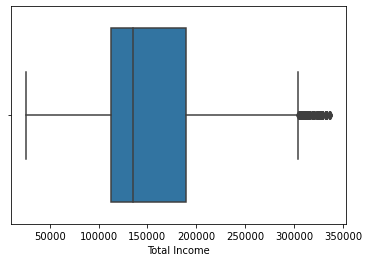

In [26]:
sns.boxplot(df['Total Income'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283162 entries, 0 to 307510
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Loan ID                   283162 non-null  int64  
 1   Payment                   283162 non-null  int64  
 2   Loan Type                 283162 non-null  object 
 3   Gender                    283162 non-null  object 
 4   Have a car?               283162 non-null  object 
 5   Have a house              283162 non-null  object 
 6   Number of Children        283162 non-null  int64  
 7   Total Income              283162 non-null  float64
 8   Amount of Credit          283162 non-null  float64
 9   Suite Type                282029 non-null  object 
 10  Income Type               283162 non-null  object 
 11  Education Type            283162 non-null  object 
 12  Family Status             283162 non-null  object 
 13  Have a phone?             283162 non-null  i

In [28]:
df['Profession'].value_counts()

Laborers                 51947
Sales staff              30413
Core staff               24958
Drivers                  17106
Managers                 16035
High skill tech staff    10276
Accountants               8584
Medicine staff            8023
Security staff            6403
Cooking staff             5732
Cleaning staff            4496
Private service staff     2417
Low-skill Laborers        2032
Waiters/barmen staff      1286
Secretaries               1213
Realty agents              685
HR staff                   493
IT staff                   442
Name: Profession, dtype: int64

In [29]:
df['Profession'].fillna('Laborers', inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283162 entries, 0 to 307510
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Loan ID                   283162 non-null  int64  
 1   Payment                   283162 non-null  int64  
 2   Loan Type                 283162 non-null  object 
 3   Gender                    283162 non-null  object 
 4   Have a car?               283162 non-null  object 
 5   Have a house              283162 non-null  object 
 6   Number of Children        283162 non-null  int64  
 7   Total Income              283162 non-null  float64
 8   Amount of Credit          283162 non-null  float64
 9   Suite Type                282029 non-null  object 
 10  Income Type               283162 non-null  object 
 11  Education Type            283162 non-null  object 
 12  Family Status             283162 non-null  object 
 13  Have a phone?             283162 non-null  i

In [31]:
df['Suite Type'].value_counts()

Unaccompanied      228616
Family              37157
Spouse, partner     10478
Children             3078
Other_B              1647
Other_A               802
Group of people       251
Name: Suite Type, dtype: int64

In [32]:
df['Suite Type'].fillna('Unaccompanied', inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283162 entries, 0 to 307510
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Loan ID                   283162 non-null  int64  
 1   Payment                   283162 non-null  int64  
 2   Loan Type                 283162 non-null  object 
 3   Gender                    283162 non-null  object 
 4   Have a car?               283162 non-null  object 
 5   Have a house              283162 non-null  object 
 6   Number of Children        283162 non-null  int64  
 7   Total Income              283162 non-null  float64
 8   Amount of Credit          283162 non-null  float64
 9   Suite Type                283162 non-null  object 
 10  Income Type               283162 non-null  object 
 11  Education Type            283162 non-null  object 
 12  Family Status             283162 non-null  object 
 13  Have a phone?             283162 non-null  i

In [35]:
obj_dtypes = [i for i in df.select_dtypes(include=np.object).columns ]
obj_dtypes

<ipython-input-35-774246220f1d>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  obj_dtypes = [i for i in df.select_dtypes(include=np.object).columns ]


['Loan Type',
 'Gender',
 'Have a car?',
 'Have a house',
 'Suite Type',
 'Income Type',
 'Education Type',
 'Family Status',
 'Profession',
 'Organization']

In [38]:
num_dtypes = [i for i in df.select_dtypes(include = np.number).columns][2:]
num_dtypes

['Number of Children',
 'Total Income',
 'Amount of Credit',
 'Have a phone?',
 'Have a mail?',
 'Number of family members']

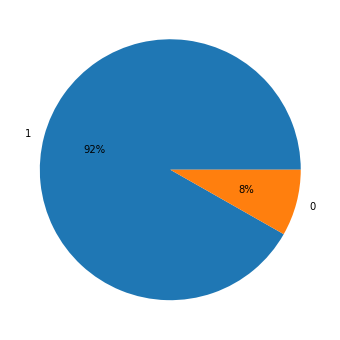

In [51]:
fig = plt.figure(figsize=(13,6))
plt.pie(df['Payment'].value_counts(),labels=df['Payment'].unique(),autopct='%1.0f%%')
plt.show()

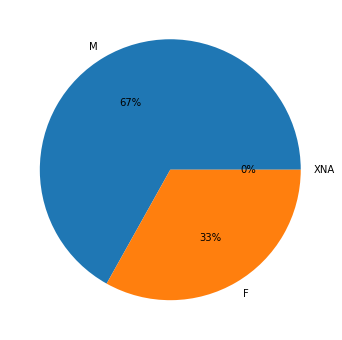

In [52]:
fig = plt.figure(figsize=(13,6))
plt.pie(df['Gender'].value_counts(),labels=df['Gender'].unique(),autopct='%1.0f%%')
plt.show()

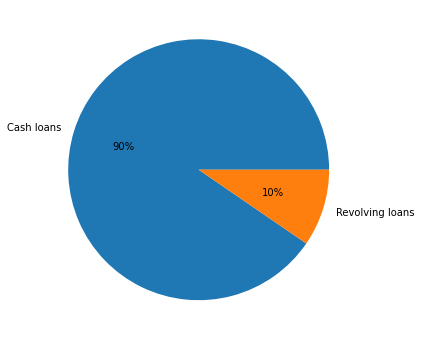

In [55]:
fig = plt.figure(figsize=(13,6))
plt.pie(df['Loan Type'].value_counts(),labels=df['Loan Type'].unique(),autopct='%1.0f%%')
plt.show()

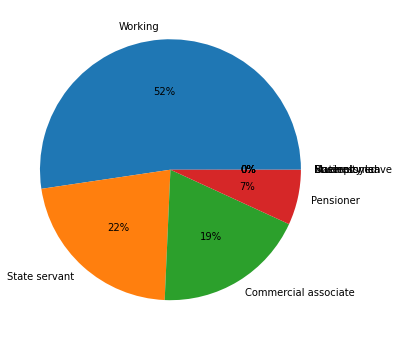

In [54]:
fig = plt.figure(figsize=(13,6))
plt.pie(df['Income Type'].value_counts(),labels=df['Income Type'].unique(),autopct='%1.0f%%')
plt.show()

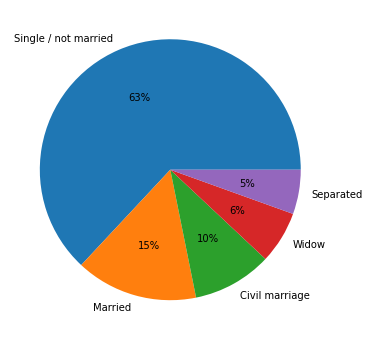

In [60]:
fig = plt.figure(figsize=(13,6))
plt.pie(df['Family Status'].value_counts(),labels=df['Family Status'].unique(),autopct='%1.0f%%')
plt.show()

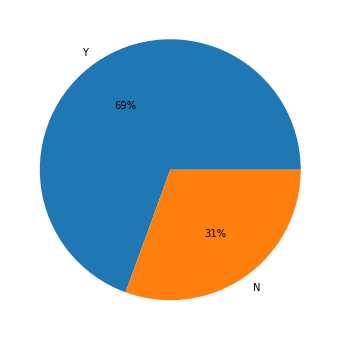

In [61]:
fig = plt.figure(figsize=(13,6))
plt.pie(df['Have a house'].value_counts(),labels=df['Have a house'].unique(),autopct='%1.0f%%')
plt.show()

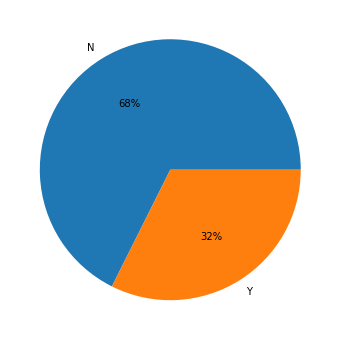

In [65]:
fig = plt.figure(figsize=(13,6))
plt.pie(df['Have a car?'].value_counts(),labels=df['Have a car?'].unique(),autopct='%1.0f%%')
plt.show()

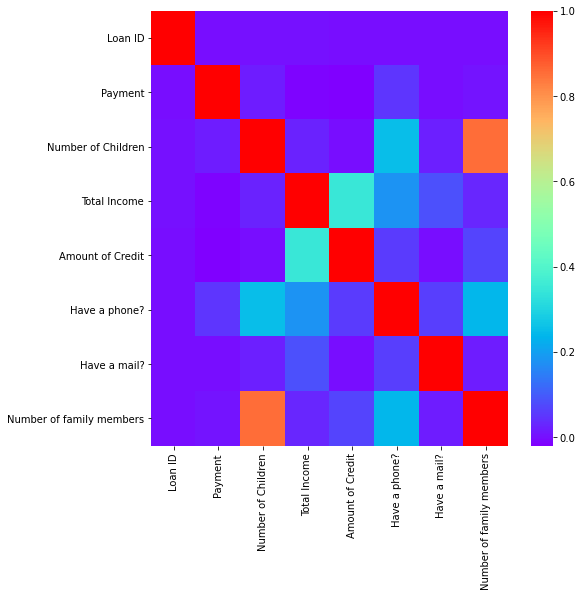

In [72]:
f, ax = plt.subplots(figsize =(8, 8)) 
sns.heatmap(df.corr() , ax = ax, cmap ="rainbow") 
plt.show()

In [68]:
df.to_csv('Risk Analytics cleaned.csv', index=False)

In [1]:
import pandas as pd
df = pd.read_csv('Risk Analytics cleaned.csv')

In [2]:
df.drop('Number of family members',axis=1,inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283162 entries, 0 to 283161
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Loan ID             283162 non-null  int64  
 1   Payment             283162 non-null  int64  
 2   Loan Type           283162 non-null  object 
 3   Gender              283162 non-null  object 
 4   Have a car?         283162 non-null  object 
 5   Have a house        283162 non-null  object 
 6   Number of Children  283162 non-null  int64  
 7   Total Income        283162 non-null  float64
 8   Amount of Credit    283162 non-null  float64
 9   Suite Type          283162 non-null  object 
 10  Income Type         283162 non-null  object 
 11  Education Type      283162 non-null  object 
 12  Family Status       283162 non-null  object 
 13  Have a phone?       283162 non-null  int64  
 14  Have a mail?        283162 non-null  int64  
 15  Profession          283162 non-nul

In [4]:
df = df[(df['Gender'] == 'F') | (df['Gender'] == 'M')]

In [6]:
objList = df.select_dtypes(include = "object").columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in objList:
    df[i] = le.fit_transform(df[i])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283158 entries, 0 to 283161
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Loan ID             283158 non-null  int64  
 1   Payment             283158 non-null  int64  
 2   Loan Type           283158 non-null  int32  
 3   Gender              283158 non-null  int32  
 4   Have a car?         283158 non-null  int32  
 5   Have a house        283158 non-null  int32  
 6   Number of Children  283158 non-null  int64  
 7   Total Income        283158 non-null  float64
 8   Amount of Credit    283158 non-null  float64
 9   Suite Type          283158 non-null  int32  
 10  Income Type         283158 non-null  int32  
 11  Education Type      283158 non-null  int32  
 12  Family Status       283158 non-null  int32  
 13  Have a phone?       283158 non-null  int64  
 14  Have a mail?        283158 non-null  int64  
 15  Profession          283158 non-nul

In [7]:
df.drop('Loan ID',axis=1,inplace=True)

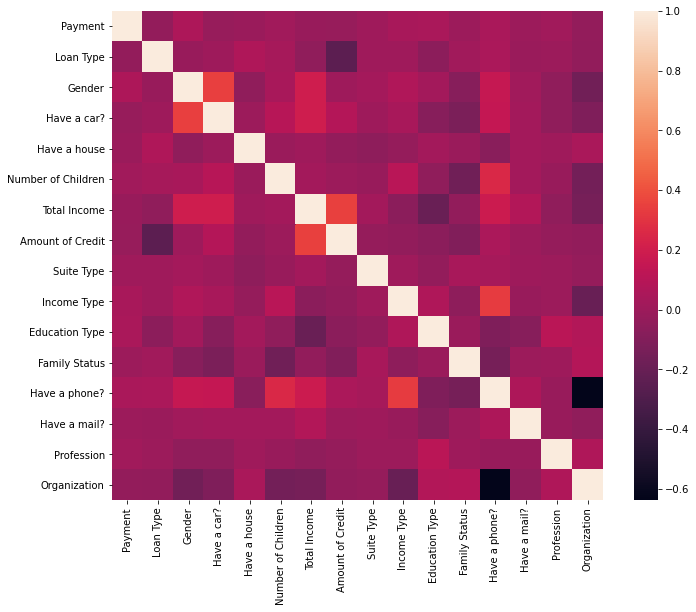

In [8]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df.corr())
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283158 entries, 0 to 283161
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Payment             283158 non-null  int64  
 1   Loan Type           283158 non-null  int32  
 2   Gender              283158 non-null  int32  
 3   Have a car?         283158 non-null  int32  
 4   Have a house        283158 non-null  int32  
 5   Number of Children  283158 non-null  int64  
 6   Total Income        283158 non-null  float64
 7   Amount of Credit    283158 non-null  float64
 8   Suite Type          283158 non-null  int32  
 9   Income Type         283158 non-null  int32  
 10  Education Type      283158 non-null  int32  
 11  Family Status       283158 non-null  int32  
 12  Have a phone?       283158 non-null  int64  
 13  Have a mail?        283158 non-null  int64  
 14  Profession          283158 non-null  int32  
 15  Organization        283158 non-nul

In [10]:
df['Payment'].value_counts()

0    259875
1     23283
Name: Payment, dtype: int64

In [11]:
X = df.iloc[:,1:]
y = df.iloc[:,:1]

In [12]:
ss = StandardScaler()
X = ss.fit_transform(X)
X = pd.DataFrame(X, columns =df.columns[1:])

In [13]:
X

,Loan Type,Gender,Have a car?,Have a house,Number of Children,Total Income,Amount of Credit,Suite Type,Income Type,Education Type,Family Status,Have a phone?,Have a mail?,Profession,Organization
0,-0.325164,1.421391,-0.692028,0.663593,-0.586452,0.814264,-0.433043,0.439893,0.903346,0.596504,1.510255,0.482187,-0.236519,0.024347,-1.213479
1,-0.325164,-0.703536,-0.692028,-1.506948,-0.586452,1.903199,2.127243,-2.372717,-0.286875,-1.771045,-0.418762,0.482187,-0.236519,-1.344164,0.445067
2,3.075369,1.421391,1.445029,0.663593,-0.586452,-1.363605,-1.217081,0.439893,0.903346,0.596504,1.510255,0.482187,-0.236519,0.024347,-0.920794
3,-0.325164,-0.703536,-0.692028,0.663593,-0.586452,-0.274670,-0.704153,0.439893,0.903346,0.596504,-1.383270,0.482187,-0.236519,0.024347,-1.213479
4,-0.325164,1.421391,-0.692028,0.663593,-0.586452,-0.492457,-0.125884,0.439893,0.903346,0.596504,1.510255,0.482187,-0.236519,-1.344164,0.347505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283153,-0.325164,1.421391,-0.692028,-1.506948,-0.586452,0.088308,-0.871535,0.439893,0.903346,0.596504,0.545747,0.482187,-0.236519,1.666559,0.640190
283154,-0.325164,-0.703536,-0.692028,0.663593,-0.586452,-1.291009,-0.828667,0.439893,-0.683615,0.596504,2.474764,-2.073884,-0.236519,0.024347,1.323120
283155,-0.325164,-0.703536,-0.692028,0.663593,-0.586452,0.015712,0.349463,0.439893,0.903346,-1.771045,0.545747,0.482187,4.227995,0.571751,0.445067
283156,-0.325164,-0.703536,-0.692028,0.663593,-0.586452,0.306095,-0.538382,0.439893,-1.477096,0.596504,-0.418762,0.482187,-0.236519,0.024347,-1.311040


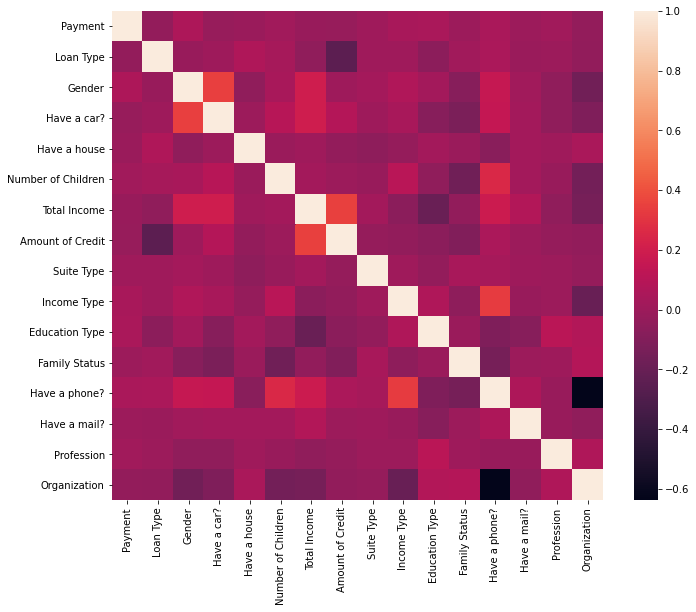

In [14]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df.corr())
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=0)

In [17]:
rfc = RandomForestClassifier(n_estimators=3)
rfc.fit(X_train,y_train)
pred = rfc.predict(X_test)


<ipython-input-17-0e58583a5770>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


In [18]:
confusion_matrix(y_test,pred)

array([[62700,  2369],
       [ 5457,   264]], dtype=int64)

In [19]:
accuracy_score(y_test,pred)

0.8894476620991666

In [ ]:
svc = SVC()
svc.fit(X_train,y_train)
pred = svc.predict(X_test)


C:\Users\Huseyn\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [ ]:
confusion_matrix(y_test,pred)

In [ ]:
accuracy_score(y_test,pred)

In [ ]:
svc = KNeighborsClassifier()
svc.fit(X_train,y_train)
pred = svc.predict(X_test)

In [ ]:
confusion_matrix(y_test,pred)

In [ ]:
accuracy_score(y_test,pred)

In [ ]:
error_rate = []

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(15,10))
plt.plot(range(1,10),error_rate, marker='o', markersize=9)